# Taylor Student Autobiography
*Robert Swanson*

This project takes several pieces of data that collected on myself over my time at Taylor. This particular file consolodates those data into a single authority on time consumption that resolves any overlaps and accounts for all time one way or another (whether its spent in class, sleeping, or unknown).

Data Sources Used
- Time Tracking Data for Homework and Jobs
- Calendar Events
- Health and Activity Data
- Money Records

In [1]:
import pandas as pd
import plotly.express as px
import re
import numpy as np

pd.options.mode.chained_assignment = None 

## Sleep Data
This data was collected by my phone and apple watch using the [Sleep Cycle](https://www.sleepcycle.com) app and standard iOS (once it was implemented). The data includes information about time spent in bed and time actually asleep, but the asleep time was inconsitently used so I just used the time spent in bed.

In [2]:
sleep_raw = pd.read_csv("Health/Sleep Analysis Raw.csv", parse_dates=['In bed Finish','In bed start'])
sleep = pd.DataFrame(columns = ['start', 'end', 'description','category'])

sleep['start'] = sleep_raw['In bed start']
sleep['end'] = sleep_raw['In bed Finish']
sleep['description'] = "Sleep"
sleep['category'] = "Sleep"
sleep['duration'] = sleep_raw['Minutes in bed'] / 60

sleep

,start,end,description,category,duration
0,2016-09-13 19:48:00,2016-09-13 21:59:00,Sleep,Sleep,2.173333
1,2016-09-13 22:04:00,2016-09-13 22:21:00,Sleep,Sleep,0.288889
2,2016-09-13 22:23:00,2016-09-13 22:27:00,Sleep,Sleep,0.075556
3,2016-09-13 22:29:00,2016-09-13 22:30:00,Sleep,Sleep,0.013333
4,2016-09-13 22:32:00,2016-09-13 22:33:00,Sleep,Sleep,0.013333
...,...,...,...,...,...
2308,2022-04-07 01:07:00,2022-04-07 09:47:00,Sleep,Sleep,8.666613
2309,2022-04-08 00:38:00,2022-04-08 08:30:00,Sleep,Sleep,7.859962
2310,2022-04-09 01:36:00,2022-04-09 10:21:00,Sleep,Sleep,8.746434
2311,2022-04-09 23:30:00,2022-04-10 09:46:00,Sleep,Sleep,10.279823


## Workout Data

In [3]:
workouts_raw = pd.read_csv("Health/Workouts.csv", parse_dates=['Start', 'End'])
workouts_raw

,Type,Start,End,Duration,Distance,Average Heart Rate,Max Heart Rate,Average Pace,Average Speed,Average Cadence,Active Energy,Total Energy,Elevation Ascended,Elevation Descended,Weather Temperature,Weather Humidity
0,Outdoor Walking,2022-04-29 21:57:00,2022-04-29 22:21:00,0:23:30,1.014575,87.668919,124.000000,0:23:10,2.589049,173.692344,72.991,137.190,87.696850,NaN,57.199999,56.0
1,Outdoor Walking,2022-04-29 19:16:00,2022-04-29 19:56:00,0:39:28,1.807244,99.501695,180.000000,0:21:50,2.747150,192.275636,141.527,213.237,57.447507,NaN,57.199999,45.0
2,Outdoor Walking,2022-04-27 23:22:00,2022-04-27 23:58:00,0:35:39,1.283091,53.960526,70.000000,0:27:47,2.159034,157.631926,85.691,134.149,7.578740,NaN,NaN,NaN
3,Outdoor Running,2022-04-26 17:31:00,2022-04-26 17:43:00,0:12:33,0.427537,115.758621,171.000000,0:29:23,2.041777,50.801039,39.115,67.337,6.660105,NaN,NaN,NaN
4,Play,2022-04-23 13:17:00,2022-04-23 14:37:00,1:19:39,1.930194,128.271583,208.000000,0:41:16,1.453738,NaN,441.525,565.815,NaN,NaN,82.399999,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Running,2018-12-07 20:16:00,2018-12-07 20:18:00,0:01:52,0.255811,157.000000,157.000000,0:07:18,8.203087,115.465942,19.635,39.336,NaN,NaN,NaN,NaN
933,Outdoor Cycling,2018-12-02 17:23:00,2018-12-02 17:30:00,0:07:08,1.200212,176.170854,176.170854,0:05:56,10.094683,NaN,62.151,71.353,37.106299,NaN,44.000000,75.0
934,Indoor Cycling,2018-12-02 17:08:00,2018-12-02 17:20:00,0:12:03,NaN,178.676780,181.447902,NaN,NaN,NaN,119.386,134.885,NaN,NaN,44.000000,74.0
935,Rowing,2018-12-02 16:59:00,2018-12-02 17:07:00,0:07:29,NaN,166.105590,166.105590,NaN,NaN,NaN,47.523,57.190,NaN,NaN,44.000000,72.0


In [4]:
workouts = pd.DataFrame()
workouts['start'] = workouts_raw['Start']
workouts['end'] = workouts_raw['End']
workouts['description'] = workouts_raw['Type']
workouts['category'] = "Workout"
workouts['duration'] = workouts_raw['Duration']  / pd.Timedelta('1 hour')
workouts

,start,end,description,category,duration
0,2022-04-29 21:57:00,2022-04-29 22:21:00,Outdoor Walking,Workout,0.391667
1,2022-04-29 19:16:00,2022-04-29 19:56:00,Outdoor Walking,Workout,0.657778
2,2022-04-27 23:22:00,2022-04-27 23:58:00,Outdoor Walking,Workout,0.594167
3,2022-04-26 17:31:00,2022-04-26 17:43:00,Outdoor Running,Workout,0.209167
4,2022-04-23 13:17:00,2022-04-23 14:37:00,Play,Workout,1.327500
...,...,...,...,...,...
932,2018-12-07 20:16:00,2018-12-07 20:18:00,Running,Workout,0.031111
933,2018-12-02 17:23:00,2018-12-02 17:30:00,Outdoor Cycling,Workout,0.118889
934,2018-12-02 17:08:00,2018-12-02 17:20:00,Indoor Cycling,Workout,0.200833
935,2018-12-02 16:59:00,2018-12-02 17:07:00,Rowing,Workout,0.124722


## Calendar Data
This data comes directly from my calendars which I've kept pretty accurate to what I've actually done during my time at taylor. I have four calendars which can indicate what kind of thing I'm doing:
1. The **classes** calendar represents time I spend in class or in a required class activity thats not homework
2. The **mob** calendar represents time I spend with Madison
3. The **personal** calendar represents meetings and activites that involve some other people (and are thus somewhat obligatory)
4. The **routine** calendar represents things I do that arn't obligatory to anyone (like eating or working out)

I exported the google calendars to `.ics` files and used [this](https://www.indigoblue.eu/ics2csv/) to convert them to csv and expand out repeated events

In [5]:
classes = pd.read_csv("Calendar/classes.csv", parse_dates=['DTSTART','DTEND'])
classes['CALENDAR'] = "School"
mob = pd.read_csv("Calendar/mob.csv", parse_dates=['DTSTART','DTEND'])
personal = pd.read_csv("Calendar/personal.csv", delimiter="\t", parse_dates=['DTSTART','DTEND'])
routine = pd.read_csv("Calendar/routine.csv", parse_dates=['DTSTART','DTEND'])

This looks at the classes and routine calendar to pattern match events to associated classes

In [6]:
projects = pd.read_csv("Tyme/Projects-Table 1.csv")
total = 0
classes['project'] = np.nan
routine['project'] = np.nan
classesPrj = classes['project']
routinePrj = routine['project']

# classes['SUMMARY'].unique()
for index, project in projects.iterrows():
    name = project['Project']
    search = project['Search Str']

    if not pd.isnull(search):
        matched = classes['SUMMARY'].str.match(".*" + search + ".*")
        classesPrj[matched] = name
        
        matched = routine['SUMMARY'].str.match(".*" + search + ".*")
        routinePrj[matched] = name
        
classes['project'] = classesPrj
classes['task'] = "Class"
routine['project'] = routinePrj
routine['task'] = "Assignment"


I used `pandas.concat` multiple times to merge multiple dataframes, here I merege the multiple calendars:

In [7]:
calendars = pd.concat([classes, mob, personal, routine])[['DTSTART', 'DTEND', 'SUMMARY', 'DURATION', 'CALENDAR', 'LOCATION', 'project', 'task']]
calendars = calendars.rename(columns={'DTSTART': 'start',  'DTEND': 'end', 'SUMMARY': 'description', 'DURATION': 'duration', 'CALENDAR': 'category', 'LOCATION': 'location'})
calendars

,start,end,description,duration,category,location,project,task
0,2018-08-28 14:00:00,2018-08-28 14:50:00,FCLA Prcpt Orange,0.833333,School,Ayres 215,NaN,Class
1,2018-08-29 08:00:00,2018-08-29 08:50:00,Interpersonal Communication,0.833333,School,Rupp 205,Interpersonal Communication,Class
2,2018-08-29 12:00:00,2018-08-29 12:50:00,Biblical Literature,0.833333,School,Reade 211,BIB LIT,Class
3,2018-08-29 13:00:00,2018-08-29 13:50:00,Foundations of Computer Science,0.833333,School,Euler 201,NaN,Class
4,2018-08-29 14:00:00,2018-08-29 14:50:00,Fund Christain Lib Arts,0.833333,School,Boren 103,Foundations,Class
...,...,...,...,...,...,...,...,...
1918,2022-04-27 15:30:00,2022-04-27 16:00:00,Practice Clarinet,0.500000,Routine,NaN,NaN,Assignment
1919,2022-05-02 15:30:00,2022-05-02 16:00:00,Practice Clarinet,0.500000,Routine,NaN,NaN,Assignment
1920,2022-05-04 15:30:00,2022-05-04 16:00:00,Practice Clarinet,0.500000,Routine,NaN,NaN,Assignment
1921,2022-05-09 15:30:00,2022-05-09 16:00:00,Practice Clarinet,0.500000,Routine,NaN,NaN,Assignment


## Tyme
This is data I've collected using the [Tyme](https://www.tyme-app.com/en/) app to record things such as homework time, time spent on work, and time spent on other personal projects. This data also includes specific information as to what class and project I'm working on.

In [8]:
tyme = pd.read_csv("Tyme/Tyme-Export.csv", parse_dates=['unix_start','unix_end'])
filter = tyme['unix_start'] != '-'
tyme = tyme[filter]
tyme['start'] = pd.to_datetime(tyme['unix_start'], unit='s')
tyme['end'] = pd.to_datetime(tyme['unix_end'], unit='s')
tyme = tyme[['start', 'end', 'amount_decimal', 'category', 'project', 'task', 'subtask']]
tyme['description'] = 'HW for ' + tyme['project']

tyme.columns.values[2] = 'duration'

## Merging
Here's where we finally merge everything togather into the `events` dataframe. We then sort and filter the data.

In [9]:
events = pd.concat([calendars, tyme, sleep, workouts]) # .set_index('start')
events = events.sort_values(by='start')
events = events[events['duration'].notna()]
events = events[events['duration'] < 24]

## Midnight Breaking
In order to be able to report exactly 24 hours of time per day, I split up any events that cross over midnight.

In [10]:
daily_events = pd.DataFrame(columns = ['start', 'end', 'description', 'duration', 'category', 'location', 'project', 'task', 'subtask'])
for index, row in events.iterrows():
    start = row['start']
    end = row['end']
    
    midnight = pd.Timestamp(year=start.year, month=start.month, day=start.day) + pd.DateOffset(1)
    tempStart = start
    
    while end > midnight:
        # print(row['description'], start, end, midnight)
        duration = (midnight - tempStart) / pd.Timedelta('1 hour')
        daily_events.loc[len(daily_events.index)] = [tempStart, midnight, row['description'], duration, row['category'], row['location'], row['project'], row['task'], row['subtask']]
        
        tempStart = midnight
        midnight += pd.DateOffset(1)
        
    duration = (end - tempStart) / pd.Timedelta('1 hour')
    daily_events.loc[len(daily_events.index)] = [tempStart, end, row['description'], duration, row['category'], row['location'], row['project'], row['task'], row['subtask']]
        
daily_events = daily_events.sort_values(by='start')

Now we can look at a single day and see the data from the multiple data sources coming together. However, we also notice that events might overlap (eg. Play and Ultimate which represent the same activity)

In [11]:
daily_events[(daily_events['start'].dt.date == pd.Timestamp('2022-4-4'))]

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,start,end,description,duration,category,location,project,task,subtask
13681,2022-04-04 00:29:00,2022-04-04 08:23:00,Sleep,7.900000,Sleep,NaN,NaN,NaN,NaN
13682,2022-04-04 01:18:34,2022-04-04 04:57:56,HW for Differential Equations,3.656111,School,NaN,Differential Equations,Diffeq Study,NaN
13683,2022-04-04 09:00:00,2022-04-04 09:50:00,Contemp (PHI 413H),0.833333,School,Reade 221,Contemp,Class,NaN
13684,2022-04-04 11:00:00,2022-04-04 12:00:00,Gerig / Mob time,1.000000,MOB,NaN,NaN,NaN,NaN
13685,2022-04-04 12:00:00,2022-04-04 12:50:00,Differential Equations,0.833333,School,Euler 101,Differential Equations,Class,NaN
13686,2022-04-04 14:00:00,2022-04-04 14:50:00,Data Vis (COS 326),0.833333,School,Nussbaum 212,Data Vis,Class,NaN
13687,2022-04-04 15:00:00,2022-04-04 16:00:00,Practice Clarinet,1.000000,Routine,NaN,NaN,Assignment,NaN
13688,2022-04-04 16:00:00,2022-04-04 16:45:00,Orchestra,0.750000,School,Music 148,NaN,Class,NaN
13689,2022-04-04 16:30:00,2022-04-04 18:00:00,Ultimate,1.500000,Personal,NaN,NaN,NaN,NaN
13690,2022-04-04 17:12:00,2022-04-04 17:56:00,HW for Differential Equations,0.733333,School,NaN,Differential Equations,Diffeq HW,NaN


This is the most computationally heavy piece of the notebook. It creates a "journal" that identifies what the data says I'm doing at any given time. It resolves instances of event overlap according to certain rules:
- It breaks of the time into the smallest atomic time blocks such that no event starts or ends in the middle of any block
- If a block contains a sleep event, it is used
- Otherwise if a block contains a workout event, it is used
- Otherwise, the event that is part of the shortest reported event is used

In [12]:
log = daily_events
log['index'] = daily_events['start']
log = log.set_index('index')
journal = pd.DataFrame(columns = ['start', 'end', 'description', 'duration', 'category', 'location', 'project', 'task', 'subtask'])


midnightA = pd.Timestamp(year=2018, month=1, day=1)
log = log[log['start'] >= midnightA]
end = log['end'].max()
midnightB = pd.Timestamp(year=end.year, month=end.month, day=end.day) + pd.DateOffset(1)

allDates = log['start'].append(log['end'])
allDates = allDates.append(pd.date_range(start=midnightA, end=midnightB).to_series())
allDates = allDates.drop_duplicates().sort_values()


start = allDates[0]

emptyHours = 0
singleUseHours = 0
overlapHours = 0

totalHours = 0

for end in allDates[1:]:
    startsBeforeEnd = log['start'] < end
    endsAfterStart = log['end'] > start
    events = log[startsBeforeEnd & endsAfterStart]
    
    duration = (end - start) / pd.Timedelta('1 hour')
    totalHours += duration
    
    if duration > 24:
        print(start, end)
    
    if (len(events) == 0):
        journal.loc[len(journal.index)] = [start, end, "Unknown", duration, 'Unknown', None, None, None, None]
        emptyHours += duration
    elif (len(events) == 1):
        event = events.iloc[0]
        journal.loc[len(journal.index)] = [start, end, event['description'], duration,  event['category'],  event['location'],  event['project'],  event['task'],  event['subtask']]
        singleUseHours += duration
    else:
        overlapHours += duration
        sleep = events[events['category'] == "Sleep"]
        workout = events[events['category'] == "Workout"]
        if (not sleep.empty):
            event = sleep.iloc[0]
        elif (not workout.empty):
            event = workout.iloc[0]
        else:
            minDur = events['duration'].min()
            event = events[events['duration'] == minDur].iloc[0]
            
        journal.loc[len(journal.index)] = [start, end, event['description'], duration,  event['category'],  event['location'],  event['project'],  event['task'],  event['subtask']]
        
        # print(start, "---", end, "Picked", event['description'], "over", len(events) -1, "other events, duration: ", duration)
        # print("start:", start, "end:", end, "\n", events)
        # input()     
    start = end

print("Total Hours:", totalHours)
print("Percent Empty:", emptyHours/totalHours*100)
print("Percent Single Use:", singleUseHours/totalHours*100)
print("Percent Overlap:", overlapHours/totalHours*100)

/tmp/ipykernel_3172374/4010582689.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDates = log['start'].append(log['end'])
/tmp/ipykernel_3172374/4010582689.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDates = allDates.append(pd.date_range(start=midnightA, end=midnightB).to_series())


Total Hours: 39239.99999999993
Percent Empty: 43.17632305470533
Percent Single Use: 46.249453505493676
Percent Overlap: 10.574223439800686


Finally, the journal is exported to csv for use in Tableau

In [13]:
journal[journal['project']=='Research 1']
# journal[(journal['start'].dt.date == pd.Timestamp('2022-4-4'))]

,start,end,description,duration,category,location,project,task,subtask
15056,2021-02-01 12:00:00,2021-02-01 12:50:00,COS 452: Research 1,0.833333,School,Euler 103,Research 1,Class,NaN
15064,2021-02-01 18:01:00,2021-02-01 18:53:00,HW for Research 1,0.866667,School,NaN,Research 1,Advisor Interaction,NaN
15093,2021-02-02 22:11:00,2021-02-02 22:21:00,HW for Research 1,0.166667,School,NaN,Research 1,Advisor Interaction,NaN
15095,2021-02-02 22:24:00,2021-02-02 22:59:00,HW for Research 1,0.583333,School,NaN,Research 1,Advisor Interaction,NaN
15119,2021-02-03 17:07:00,2021-02-03 18:00:00,HW for Research 1,0.883333,School,NaN,Research 1,Advisor Interaction,NaN
...,...,...,...,...,...,...,...,...,...
17273,2021-05-28 22:46:00,2021-05-28 23:46:00,HW for Research 1,1.000000,School,NaN,Research 1,Java Objects,NaN
17566,2021-06-27 02:00:00,2021-06-27 02:27:00,HW for Research 1,0.450000,School,NaN,Research 1,Java Objects,NaN
17779,2021-07-11 19:07:00,2021-07-11 20:00:00,HW for Research 1,0.883333,School,NaN,Research 1,Java Objects,NaN
17781,2021-07-11 21:00:00,2021-07-11 22:00:00,HW for Research 1,1.000000,School,NaN,Research 1,Java Objects,NaN


In [14]:
journal.to_csv("Journal.csv")
journal

,start,end,description,duration,category,location,project,task,subtask
0,2018-01-01 00:00:00,2018-01-01 01:32:00,Unknown,1.533333,Unknown,None,None,None,None
1,2018-01-01 01:32:00,2018-01-01 09:30:00,Sleep,7.966667,Sleep,NaN,NaN,NaN,NaN
2,2018-01-01 09:30:00,2018-01-02 00:00:00,Unknown,14.500000,Unknown,None,None,None,None
3,2018-01-02 00:00:00,2018-01-02 02:00:00,Unknown,2.000000,Unknown,None,None,None,None
4,2018-01-02 02:00:00,2018-01-02 10:02:00,Sleep,8.033333,Sleep,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22660,2022-06-21 00:00:00,2022-06-22 00:00:00,Unknown,24.000000,Unknown,None,None,None,None
22661,2022-06-22 00:00:00,2022-06-23 00:00:00,Unknown,24.000000,Unknown,None,None,None,None
22662,2022-06-23 00:00:00,2022-06-23 09:00:00,Unknown,9.000000,Unknown,None,None,None,None
22663,2022-06-23 09:00:00,2022-06-23 10:00:00,Optiver Relocation Bonus,1.000000,Personal,NaN,NaN,NaN,NaN


## Get Daily Data

In [15]:
daily = journal
catagories = daily['category'].unique()
daily['day'] = daily['start'].dt.date
daily = daily.groupby(['day', 'category']).agg('sum').unstack(fill_value=0).stack()
daily.to_csv("Daily.csv") 

daily

duration
day        category           
2018-01-01 MOB        0.000000
           Personal   0.000000
           Routine    0.000000
           School     0.000000
           Sleep      7.966667
...                        ...
2022-06-23 School     0.000000
           Sleep      0.000000
           Unknown   23.000000
           Work       0.000000
           Workout    0.000000

[13080 rows x 1 columns]

## Assignment Questions

Your project should address the following questions.

- What research question(s) did you explore? Why are your questions(s) relevant?
    > During my time here at Taylor, how did I spend resources such as time and money, and were there any behavioral changes during my time?
- Who are your intended audience?
    > This information could be of interest to any Taylor student or prospective student, or their parents. It can give an in-depth look at a particular data sample (me) with respect to these properties.
- What data sets have you chosen to analyze/visualize? How did you choose the data sets? Why do you have confidence that these data will help answer your research questions?
    > I used data I've collected on myself through time tracking, calendars, money records, and health/exercise data. Much (but notabaly not all) of my time can be accounted for by one or more sources of data collection, and can provide a pretty comprehensive look at how I spend my time.
- What tools and techniques did you employ to visualize your data?
    > - Exporting iPhone data via utility apps
    > - Export google calendar data to ICS then converting it to CSV
    > - Using Apple numbers and python to repeadably transform the data into useful forms
    > - Using Tableau to easily explore the data and produce interactive visuals
    
- What types of visualizations did you produce? Why did you chose those particular visualizations?
    > Many bar charts which can show amounts of resources (eg. time, money, calories) expended on particular categories
- How did you choose your analysis and visualization strategy to communicate clearly and honestly to your audience?
    > I aimed to tell a story rather than necessarily find patterns that make a point. Thus I didn't need to contort visuals to show patterns, but could still filter out visulals that don't really say anything.
- What impact do you hope your analysis and visualizations will have on your audience?
    > I hope they will be more cognisant of how they spend their own resources and maybe explore tracking themselves if they want to better use those resources. I also want them to have a greater understanding of the Taylor experience


In [16]:
import july
from july.utils import date_range

In [17]:
def calendarPlot(filter, dates, title=""):

    data = pd.DataFrame()
    data['date'] = dates

    calendar = journal[filter]
    calendar['day'] = calendar['start'].dt.date
    calendar = calendar.groupby(['day']).sum().reset_index()

    data = pd.merge(data, calendar, how="left", on=None, left_on='date', right_on='day', sort=True)

    july.heatmap(data['date'], data['duration'], cmap="golden", colorbar=True, title=title)

    
def college(filter, title=""):
    calendarPlot(filter, date_range("2018-08-01", "2019-7-31"), "Freshman Year " + title)
    calendarPlot(filter, date_range("2019-08-01", "2020-7-31"), "Sophmore Year " + title)
    calendarPlot(filter, date_range("2020-08-01", "2021-7-31"), "Junior Year " + title)
    calendarPlot(filter, date_range("2021-08-01", "2022-7-31"), "Senior Year " + title)

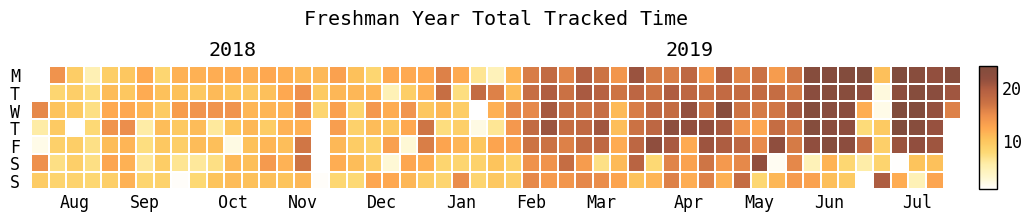

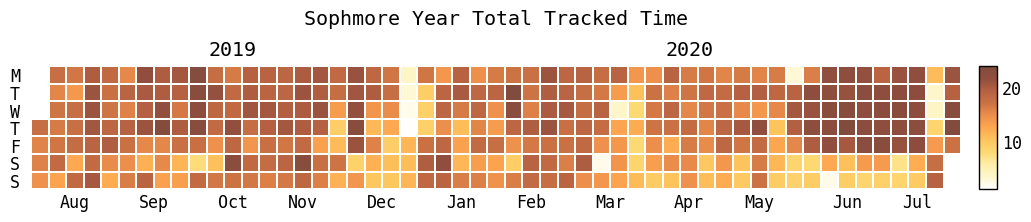

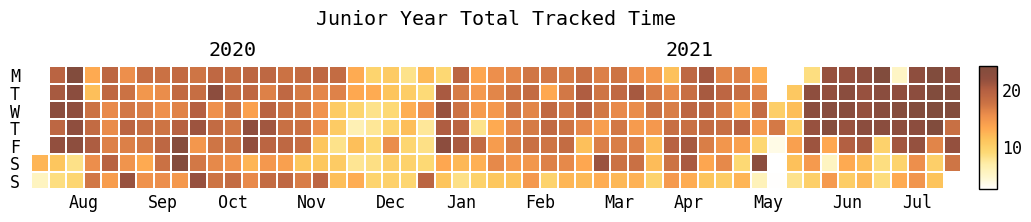

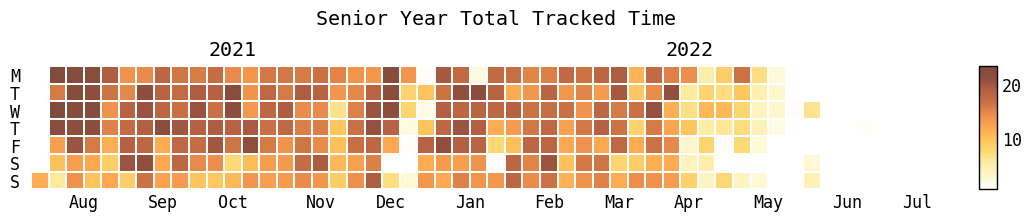

In [18]:
college(journal['category'] != "Unknown", title="Total Tracked Time")

/opt/tljh/user/lib/python3.9/site-packages/july/helpers.py:77: RuntimeWarning: All-NaN slice encountered
  pc.set_clim(cmin or np.nanmin(cal), cmax or np.nanmax(cal))
/opt/tljh/user/lib/python3.9/site-packages/july/helpers.py:77: RuntimeWarning: All-NaN slice encountered
  pc.set_clim(cmin or np.nanmin(cal), cmax or np.nanmax(cal))
/opt/tljh/user/lib/python3.9/site-packages/july/helpers.py:77: RuntimeWarning: All-NaN slice encountered
  pc.set_clim(cmin or np.nanmin(cal), cmax or np.nanmax(cal))
/opt/tljh/user/lib/python3.9/site-packages/july/helpers.py:77: RuntimeWarning: All-NaN slice encountered
  pc.set_clim(cmin or np.nanmin(cal), cmax or np.nanmax(cal))


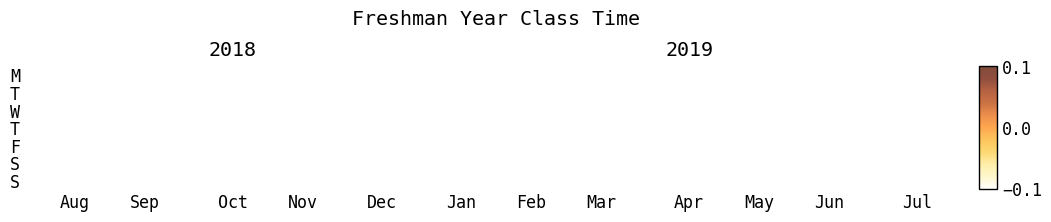

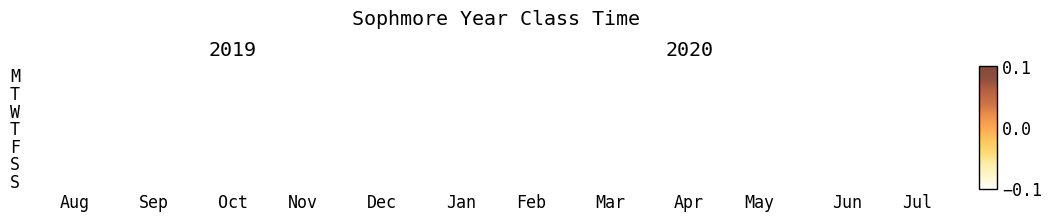

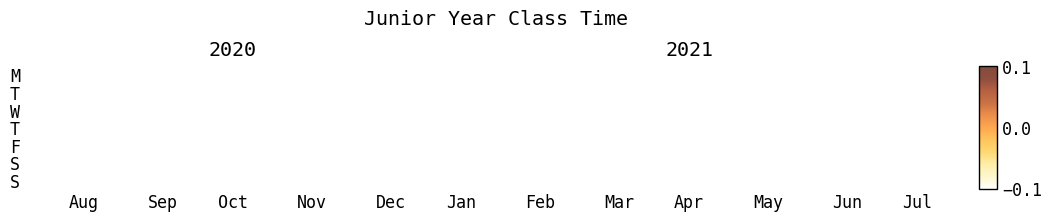

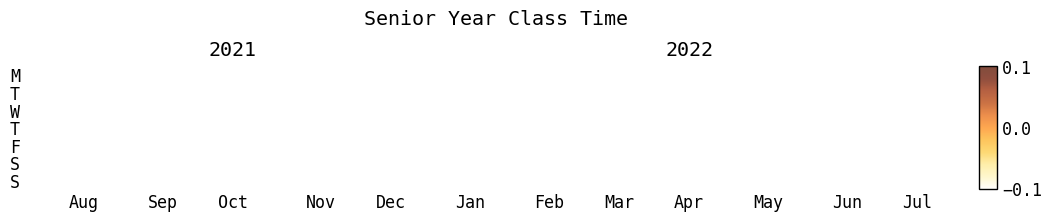

In [19]:
college(journal['category'] == "Classes", title="Class Time")

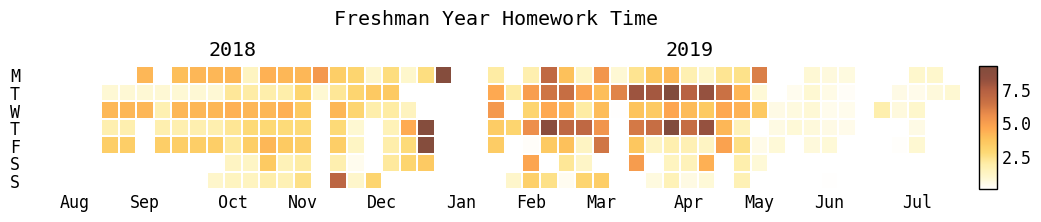

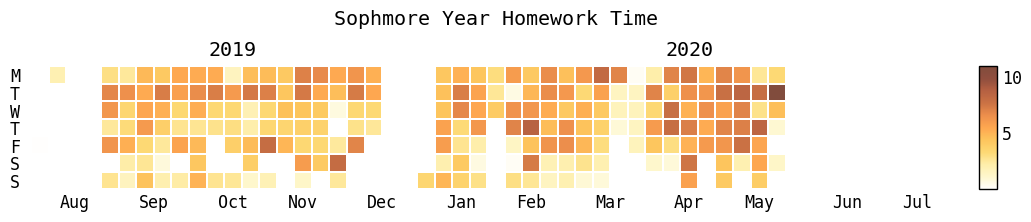

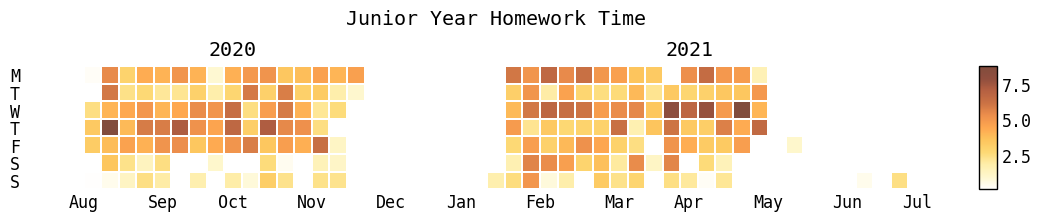

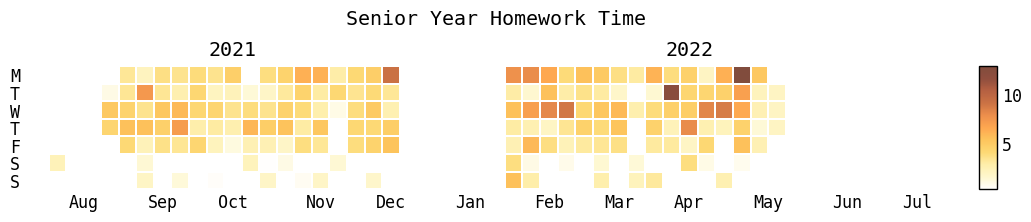

In [20]:
college(journal['category'] == "School", title="Homework Time")

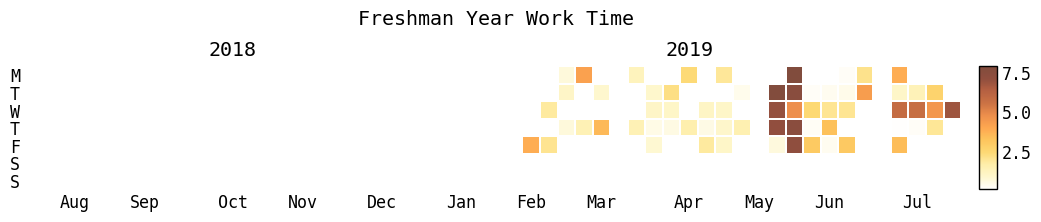

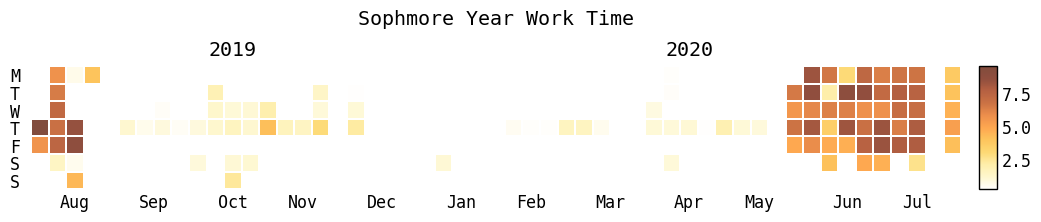

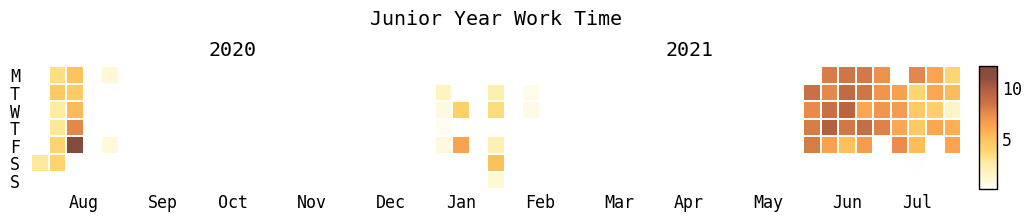

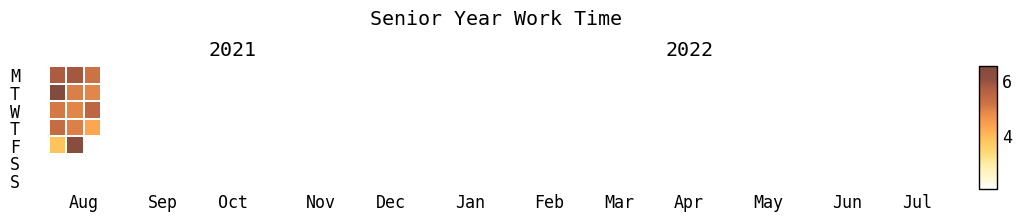

In [21]:
college(journal['category'] == "Work", title="Work Time")

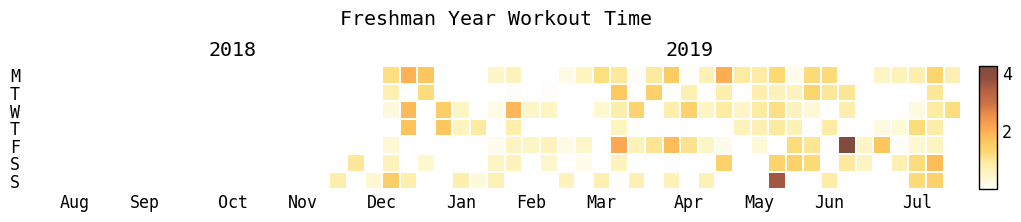

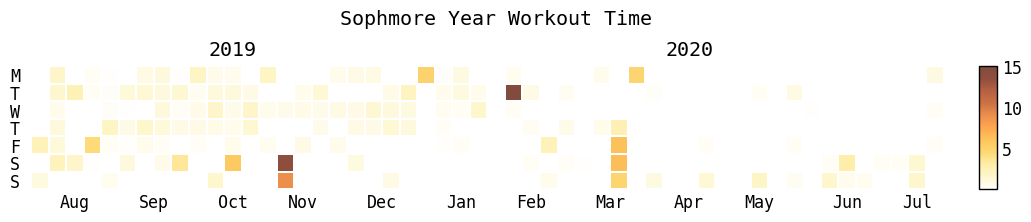

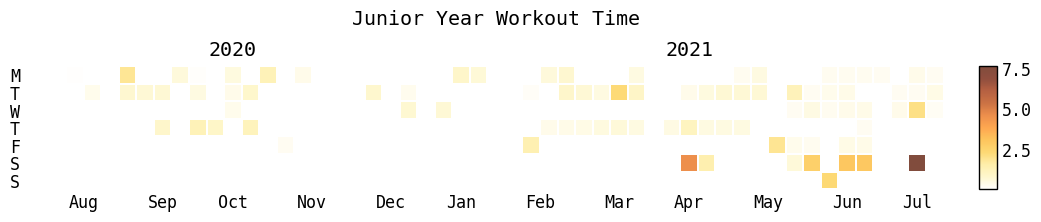

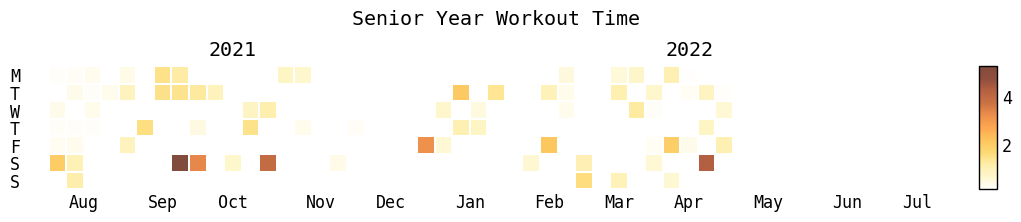

In [22]:
college(journal['category'] == "Workout", title="Workout Time")

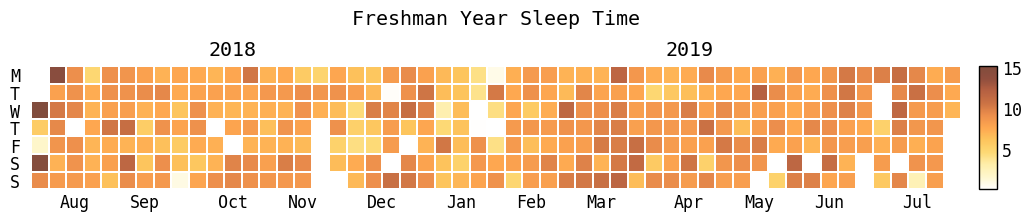

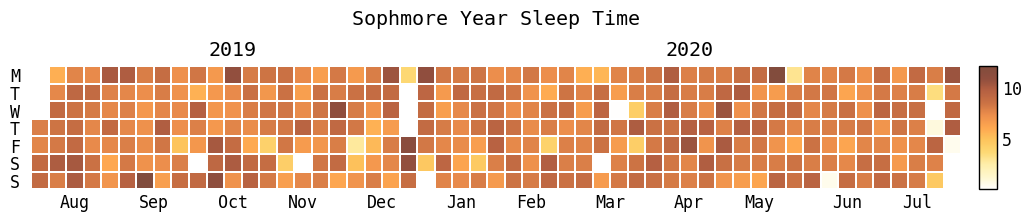

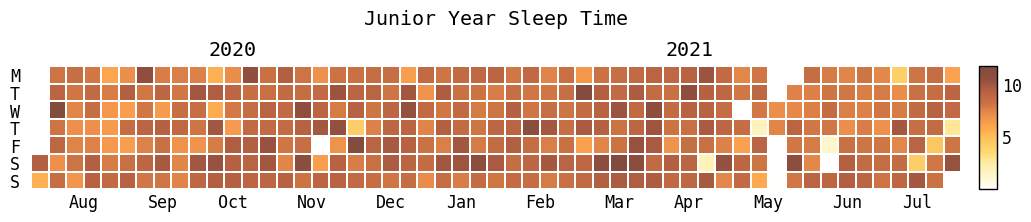

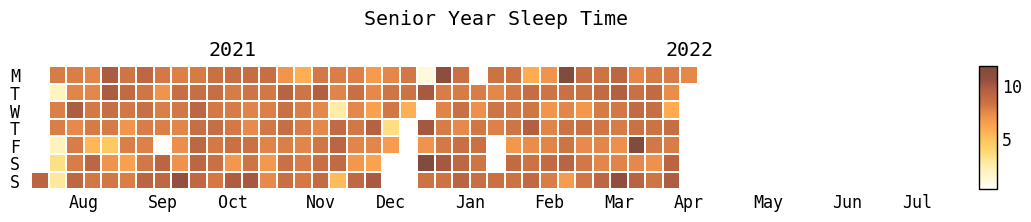

In [23]:
college(journal['category'] == "Sleep", title="Sleep Time")